In [ ]:
#Authour: Aaron Edwards
#Finale project on Covid Vaccination data

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

url = "https://raw.githubusercontent.com/carloxchiare/CovidDataforFinal/main/country_vaccinations.csv"
df = pd.read_csv(url, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Began my EDA by understanding my variables in the dataset
df.columns


Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [ ]:
#Find out how large the dataframe is
df.shape

(86512, 15)

In [ ]:
#Now to explore the values for each variable 
df.nunique(axis=0)

country                                  223
iso_code                                 223
date                                     483
total_vaccinations                     42828
people_vaccinated                      40194
people_fully_vaccinated                37425
daily_vaccinations_raw                 27692
daily_vaccinations                     40516
total_vaccinations_per_hundred         17881
people_vaccinated_per_hundred           9078
people_fully_vaccinated_per_hundred     8772
daily_vaccinations_per_million         12405
vaccines                                  84
source_name                               81
source_website                           119
dtype: int64

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


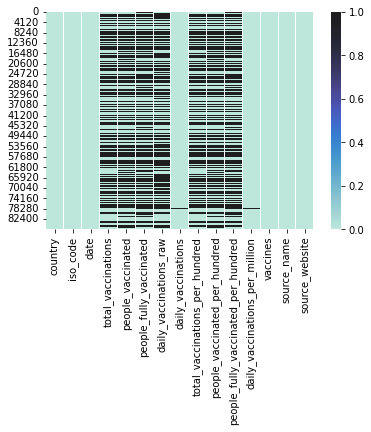

In [ ]:
#Visualise Missing Values in Data before dropping NAN values
sns.heatmap(df.isnull(),center=1)

In [ ]:
#Drop null values 
df = df.dropna()
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
433,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
515,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


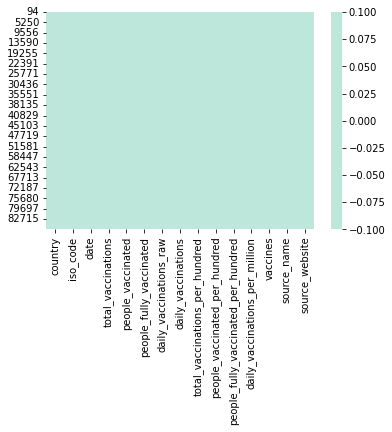

In [ ]:
#Again Visualise misisng values to enure they have been removed for Exploratory Data Analysis
sns.heatmap(df.isnull(),center = 1)

In [ ]:
#See what new size of the dataframe is now that Null values have been dropped 
df.shape

(30847, 15)

In [ ]:
#Clean data to rename cols for cleaner EDA 
list(df)

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

In [ ]:
#Change Variable names
df.rename(columns = {'total_vaccinations':'TotalVax', 'people_vaccinated':'PeopleVax','people_fully_vaccinated':'FullVax', 
                     'daily_vaccinations_raw':'DailyVaxR', 'daily_vaccinations':'DailyVax','people_vaccinated_per_hundred': 'Vax100', 'total_vaccinations_per_hundred':'Per100', 
                     'people_fully_vaccinated_per_hundred':'Per100VaxF', 'daily_vaccinations_per_million':'DailyPerMil', 
                     'source_name':'Source', 'source_website':'Website'}, inplace = True)
df

,country,iso_code,date,TotalVax,PeopleVax,FullVax,DailyVaxR,DailyVax,Per100,Vax100,Per100VaxF,DailyPerMil,vaccines,Source,Website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
433,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
515,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [ ]:
#Count the sources of the data and how many times they appear in the dataset
df["Source"].value_counts()

Ministry of Health                            7488
Government of the United Kingdom              2169
World Health Organization                     1184
Federal Office of Public Health                883
Centers for Disease Control and Prevention     470
                                              ... 
Finnish Institute for Health and Welfare        18
National Health Commission                      17
Public Health Agency of Sweden                   3
SPC Public Health Division                       2
Government of Guernsey                           1
Name: Source, Length: 75, dtype: int64

In [ ]:
df.describe()

,TotalVax,PeopleVax,FullVax,DailyVaxR,DailyVax,Per100,Vax100,Per100VaxF,DailyPerMil
count,3.084700e+04,3.084700e+04,3.084700e+04,3.084700e+04,3.084700e+04,30847.000000,30847.000000,30847.000000,30847.000000
mean,3.980375e+07,2.177533e+07,1.579596e+07,2.021875e+05,1.975297e+05,88.609156,44.793028,36.563440,4254.195708
std,1.451667e+08,8.053173e+07,5.898165e+07,7.041931e+05,6.400504e+05,67.492111,28.464379,28.532602,3723.291475
min,3.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.153332e+06,7.339795e+05,3.704450e+05,5.498000e+03,7.329500e+03,25.475000,17.190000,7.400000,1567.500000
50%,6.335305e+06,3.688092e+06,2.211035e+06,2.908100e+04,3.247200e+04,81.470000,48.160000,34.110000,3254.000000
75%,2.520629e+07,1.440668e+07,9.121526e+06,1.344580e+05,1.402915e+05,140.745000,70.330000,63.570000,6069.500000
max,3.243599e+09,1.275541e+09,1.240777e+09,1.862727e+07,1.307071e+07,345.370000,124.760000,122.370000,78604.000000


In [ ]:
#Visualisation Series exploring data  

[Text(0.5, 1.0, 'Correlation Heat Map between')]

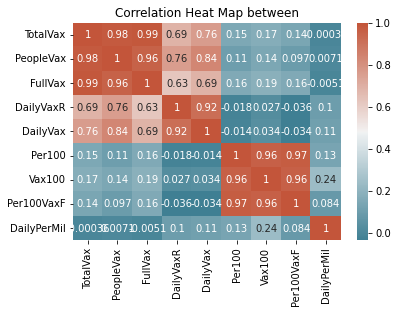

In [ ]:
# calculate correlation matrix and create heat map from no correlation to a perfect correctlation of 1 
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)).set(title="Correlation Heat Map between")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


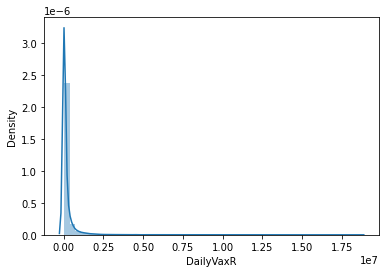

In [ ]:
#Distribution graph of the number of vaccination for that date/country
sns.distplot(df['DailyVaxR'])

[Text(0.5, 1.0, 'Histogram of People Fully Vaxxed vs Daily amount of people Vaxxed per Million')]

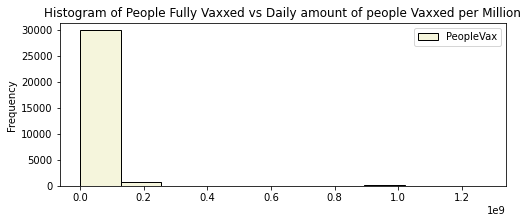

In [ ]:
df.plot(kind='hist', x='date', y='PeopleVax', bins=10, figsize=(8,3), facecolor='beige',edgecolor='black').set(title ="Histogram of People Fully Vaxxed vs Daily amount of people Vaxxed per Million")

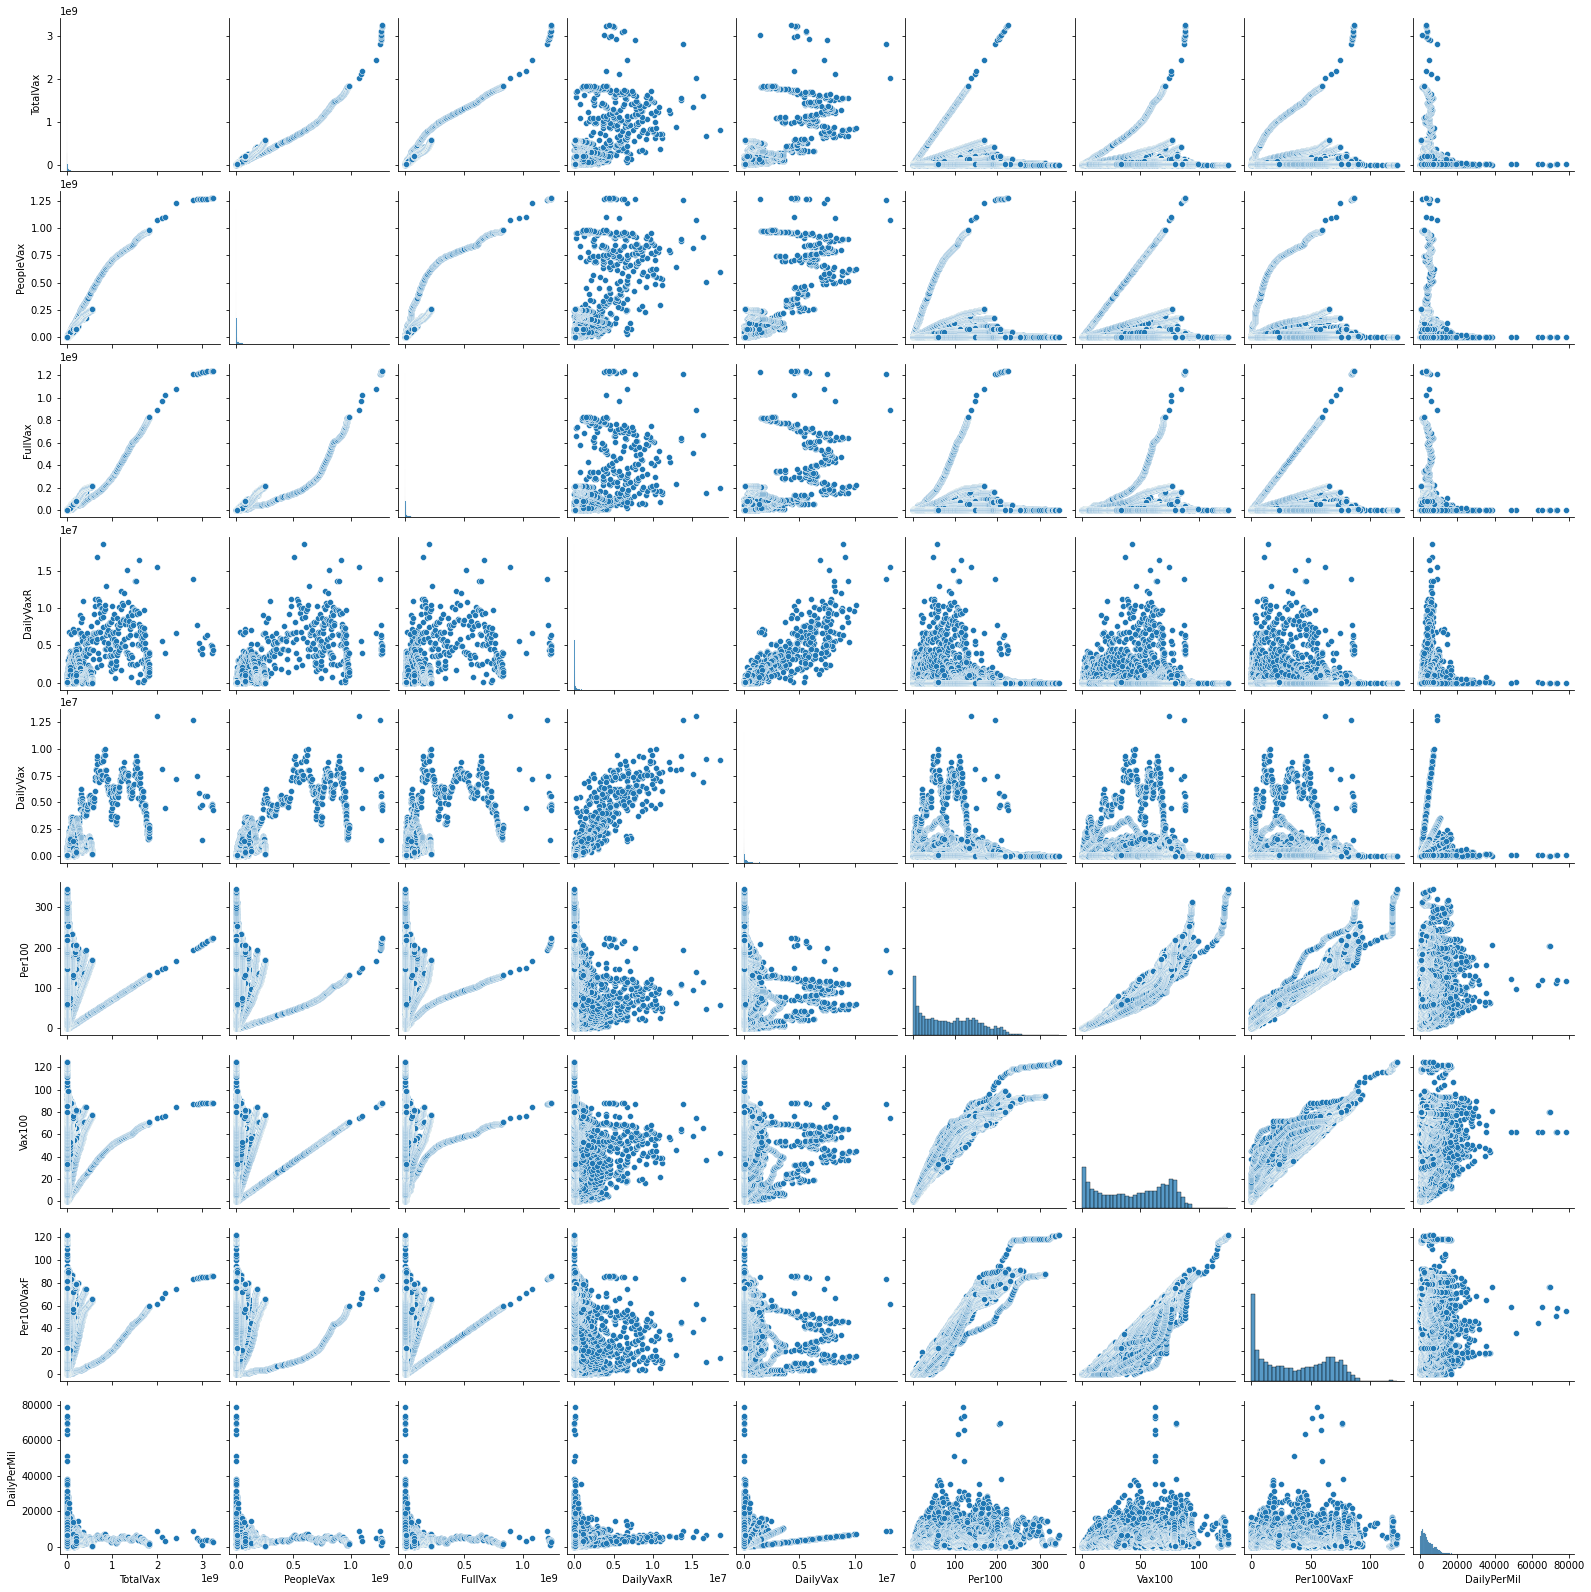

In [ ]:
#Create pairplot to understand the best set of features
#view relationship between two variables or to form the most separated clusters
sns.pairplot(df)

In [ ]:
#End Of Document
